In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
path = Path(r"C:\Users\ramos\Desktop\GitHub\Kaggle-Competition-Age-Prediction\age-prediction-spring-25-at-cu-denver\wiki_labels.csv")
df = pd.read_csv(path)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Shape: (60327, 11)
Columns: ['ID', 'dob', 'dob_str', 'photo_taken', 'full_path', 'gender', 'name', 'face_location', 'face_score', 'second_face_score', 'age']
     ID     dob          dob_str  photo_taken  \
0  2002  723671  ['05-May-1981']         2009   
1  2003  711677  ['03-Jul-1948']         2008   
2  2004  705061  ['23-May-1930']         1961   
3  2005  720044  ['31-May-1971']         2012   
4  2006  716189  ['09-Nov-1960']         2012   

                             full_path  gender                      name  \
0  ['17/10000217_1981-05-05_2009.png']     1.0       ['Sami Jauhojärvi']   
1    ['12/100012_1948-07-03_2008.png']     1.0           ['Marc Okrand']   
2  ['65/10001965_1930-05-23_1961.png']     1.0  ['Aleksandar Matanović']   
3  ['16/10002116_1971-05-31_2012.png']     0.0          ['Diana Damrau']   
4  ['02/10002702_1960-11-09_2012.png']     0.0        ['Krista Tippett']   

                                       face_location   face_score  \
0  [[111.29109473 111

In [ ]:
print(f"\nStats for Age:")
print(df['age'].describe())
print(df['gender'].value_counts())

print(f"\nNaNs in age: {df['age'].isna().sum()}")
print(f"\nUnique ages: {df['age'].unique()[:50]}")

df["face_score"] = pd.to_numeric(df["face_score"], errors="coerce")

thresholds = [0.3, 0.5, 1.0, 5.0]
below_threshold_counts = {}
for thresh in thresholds:
    below_threshold_counts[thresh] = (df["face_score"] < thresh).sum()

second_face_count = df["second_face_score"].notna().sum()

print(f"\nUnder thresholds counts: {below_threshold_counts}")
print(f"\nSecond face count: {second_face_count}")


Stats for Age:
count    60327.000000
mean        36.718077
std         21.246293
min          0.000000
25%         23.788356
50%         30.455023
75%         46.270548
max        791.793836
Name: age, dtype: float64
gender
1.0    45558
0.0    12216
Name: count, dtype: int64

NaNs in age: 0

Unique ages: [27.74611872 59.58219178 30.69680365 40.67214612 51.22420091 33.34703196
 77.14908676 60.43584475 28.87716895 41.45502283 35.64360731 22.71598174
 28.04657534 37.60799087 24.81849315 31.8239726  36.46050228 18.62990868
 77.57123288 50.70228311 41.86073059 30.22694064 33.00273973 27.84429224
 33.34155251 29.16826484 59.40730594 12.68584475 26.61073059  0.
 60.09155251 41.31027397 29.91940639 67.81849315 24.51643836 23.993379
 48.97694064 45.51643836 24.03287671 33.49885845 71.72968037 30.81575342
 52.33219178 50.75273973 46.71872146 56.10525114 33.6803653  55.07945205
 22.17488584 29.71050228]

Under thresholds counts: {0.3: np.int64(0), 0.5: np.int64(0), 1.0: np.int64(1288), 5.0: np.i

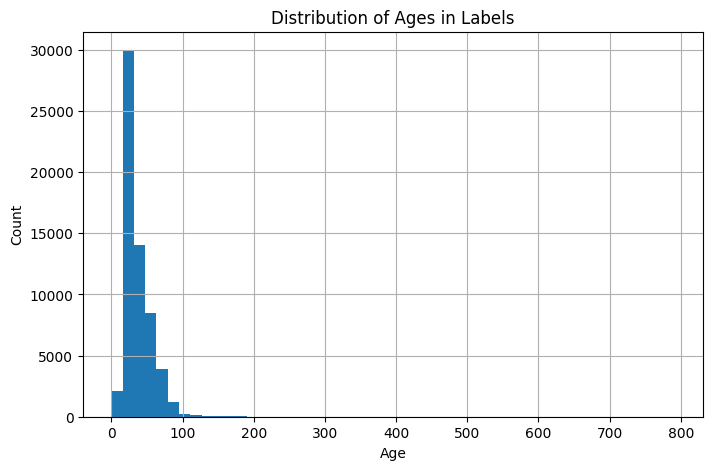

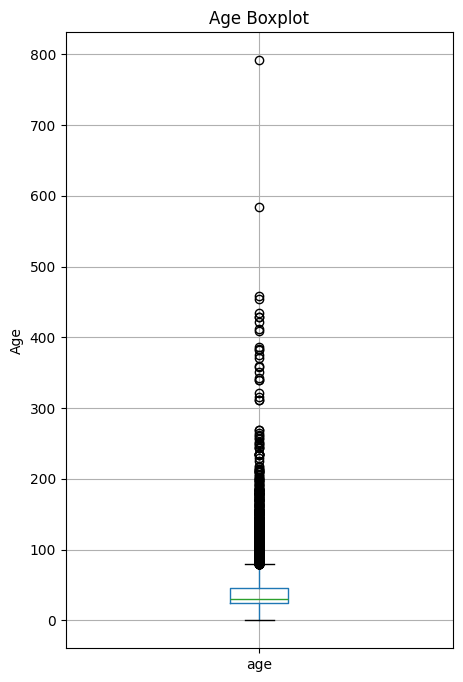

In [4]:
plt.figure(figsize=(8, 5))
df['age'].hist(bins=50)
plt.title("Distribution of Ages in Labels")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(5, 8))
df.boxplot(column=['age'])
plt.title("Age Boxplot")
plt.ylabel("Age")
plt.show()

In [7]:
outliers = df[df['age'] > 120]
print(f"outliers:\n{outliers}")

outliers:
          ID     dob          dob_str  photo_taken  \
872     2874  680241  ['08-Jun-1862']         2004   
1009    3011  687873  ['01-May-1883']         2004   
1019    3021  677531  ['06-Jan-1855']         1999   
1063    3065  676449  ['20-Jan-1852']         2004   
1293    3295  672746  ['30-Nov-1841']         1988   
...      ...     ...              ...          ...   
58586  60588  690297  ['19-Dec-1889']         2013   
58911  60913  660359  ['01-Jan-1808']         1952   
59198  61200  681392  ['02-Aug-1865']         2009   
59834  61836  658516  ['15-Dec-1802']         2012   
60085  62087  675835  ['16-May-1850']         1977   

                                 full_path  gender  \
872    ['35/21038435_1862-06-08_2004.png']     1.0   
1009   ['90/31029690_1883-05-01_2004.png']     1.0   
1019   ['50/31038050_1855-01-06_1999.png']     1.0   
1063   ['70/31071970_1852-01-20_2004.png']     1.0   
1293   ['77/12000377_1841-11-30_1988.png']     1.0   
...              

In [8]:
df["face_score"] = df["face_score"].replace("#NAME?", np.nan)
df["face_score"] = df["face_score"].astype(float)

df["second_face_score"] = df["second_face_score"].replace("#NAME?", np.nan)
df["second_face_score"] = pd.to_numeric(df["second_face_score"], errors="coerce")

correlation_matrix = df[["age", "face_score", "second_face_score"]].corr()
print(f"\nCorrelation matrix:\n{correlation_matrix}")


Correlation matrix:
                        age  face_score  second_face_score
age                1.000000   -0.062152          -0.025828
face_score        -0.062152    1.000000           0.441816
second_face_score -0.025828    0.441816           1.000000
